## Clustering in Real World
Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

### Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

Extract RGB values into three lists.
Perform k-means clustering on scaled RGB values.
Display the colors of cluster centers.
To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have been initialized.

In [25]:
import pandas as pd
import matplotlib.image as img
import numpy as np
from scipy.cluster.vq import whiten,kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns

image = img.imread('sea.jpg') # 
image.shape

r,g,b = [], [],[]

for row in image:
    for pixel in row:
    #A pixel contains rgb values
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
pixels = pd.DataFrame({'red':r, 'blue':b, 'green':g})

# normalize data 
pixels['scaled_red']   = whiten(pixels['red'] )
pixels['scaled_blue']  = whiten(pixels['blue'] )
pixels['scaled_green'] = whiten(pixels['green'] )

pixels.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,245,250,255,3.371935,4.123695,3.942805
1,245,249,254,3.371935,4.107200,3.927343
2,249,253,255,3.426987,4.173179,3.942805
3,251,254,255,3.454513,4.189674,3.942805
4,250,251,255,3.440750,4.140190,3.942805


### How many dominant colors?
We have loaded the following image using the imread() function of the image class of matplotlib.

The RGB values are stored in a data frame, pixels. The RGB values have been standardized used the whiten() function, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the data frame. How many dominant colors are present?

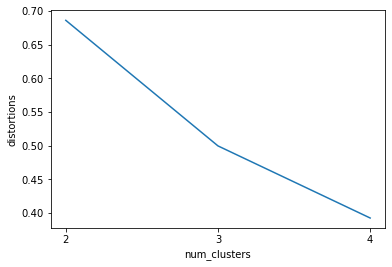

In [36]:
## create an elbow plot
distortions = []
num_clusters =  range(2, 5)

# create a list of distortions from the kmeans method
for k in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], k)
    distortions.append(distortion)

#create a df with numbers of clusters and distortions
df = pd.DataFrame({'num_clusters':num_clusters, 
                'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x= 'num_clusters', y='distortions', data = df)
plt.xticks(num_clusters)
plt.show()

#the optimal number of cluster is 3 

### Display dominant colors
We have loaded the following image using the imread() function of the image class of matplotlib.

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: converted_pixel = standardized_pixel * pixel_std / 255

The RGB values are stored in a data frame, pixels. The scaled RGB values are stored in columns, scaled_red, scaled_blue and scaled_green. The cluster centers are stored in the variable cluster_centers, which were generated using the kmeans() function with three clusters.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


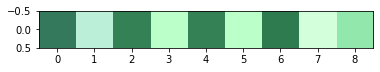

In [37]:
## find dominat colors
cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue','scaled_green']], 3)
# Get standard deviations of each color
r_std, g_std, b_std  = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r *  r_std/ 255,
        scaled_g * g_std / 255,
        scaled_b * b_std/ 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()


In [ ]:
### Document clustering
# import nltk
# nltk.download()
from nltk import word_tokenize
import re

# convert text into smaller parts - tokens, clean data for processing
def remove_noise(text, stop_words =[]):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            #Get lowercase
            cleaned_tokens.append(token.lower())
            
    return cleaned_tokens

#example
print(remove_noise("It is lovely weather we are having. I hope the weather continues"))

# this function does not work in the same way that in datacamp
# problem with nltk

### TF-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

Note: It takes a few seconds to run the .fit_transform() method.

In [55]:
# load data
plots = pd.read_csv('movies_plot.csv')

# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer class with minimum and maximum frequencies 
# of 0.1 and 0.75, and 50 maximum features.
tfidf_vectorizer = TfidfVectorizer(max_df = 0.75, max_features = 50, 
                                   min_df = 0.1, tokenizer =  remove_noise)

# Use the fit_transform() method on the initialized TfidfVectorizer class 
# with the list plots.
tfidf_matrix = tfidf_vectorizer.fit_transform (plots)
print(tfidf_matrix)

  (0, 1)	1.0
  (1, 0)	1.0


### Top terms in movie clusters
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.

In [54]:
# define # clusters
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

# the output will not be the same due to remove_noise

['plot', 'title']
['title', 'plot']


                scaled_heading_accuracy  scaled_volleys  scaled_finishing
cluster_labels                                                           
0                              3.208366        2.832726          2.764816
1                              0.710196        0.639003          0.579890
cluster_labels
0    886
1    114
Name: ID, dtype: int64


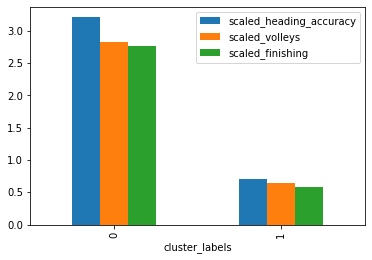

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'R. Lewandowski']
1 ['M. Neuer' 'De Gea' 'T. Courtois' 'G. Buffon' 'J. Oblak']


In [65]:
### Clustering with multiple features

# load data
fifa = pd.read_csv('fifa_18_sample_data.csv')

# normalize data 
fifa['scaled_heading_accuracy'] = whiten(fifa['heading_accuracy'])
fifa['scaled_volleys']          = whiten(fifa['volleys'])
fifa['scaled_finishing']        = whiten(fifa['finishing'])

# Generate cluster centers
cluster_centers, distortion = kmeans(fifa[['scaled_heading_accuracy',
                                           'scaled_volleys', 
                                           'scaled_finishing' ]], 2)

# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_heading_accuracy',
                                                   'scaled_volleys', 
                                                   'scaled_finishing' ]],cluster_centers)

# cluster centers
print(fifa.groupby('cluster_labels')[['scaled_heading_accuracy',
                                      'scaled_volleys', 
                                      'scaled_finishing' ]].mean())

# cluster sizes
print(fifa.groupby('cluster_labels')['ID'].count())

# visualize clusters
fifa.groupby('cluster_labels')[['scaled_heading_accuracy',
                                'scaled_volleys', 
                                'scaled_finishing' ]].mean().plot(kind = 'bar')
plt.show()

# get the name colum of top 5 players in each cluster

for cluster in fifa['cluster_labels'].unique():
    print(cluster, 
          fifa[fifa['cluster_labels']==cluster]['name'].values[:5])
    
# feature reduction
# factor analysis
# multidimensional scalling

###  Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, fifa. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in Pandas help you find the number of observations and mean of observations in a data frame.

In [66]:
# normalize data 
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

# Generate cluster centers
cluster_centers, distortion = kmeans(fifa[['scaled_pac',
                                           'scaled_dri', 
                                           'scaled_sho' ]], 3)

# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_pac',
                                                   'scaled_dri', 
                                                   'scaled_sho' ]],cluster_centers)


# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())
# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())



cluster_labels
0    487
1    181
2    332
Name: ID, dtype: int64
cluster_labels
0    75632.443532
1    62193.370166
2    64283.132530
Name: eur_wage, dtype: float64


### FIFA 18: what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, fifa. features is the list of these column names and scaled_features is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns.

Before you start the exercise, you may wish to explore scaled_features in the console to check out the list of six scaled columns names.

                scaled_pac  scaled_dri  scaled_sho  scaled_pas  scaled_def  \
cluster_labels                                                               
0                 5.444516    6.759972    3.664623    7.165875    3.967897   
1                 6.684385    8.513096    5.427481    8.455351    2.504167   

                scaled_phy  
cluster_labels              
0                 9.210371  
1                 8.336310  


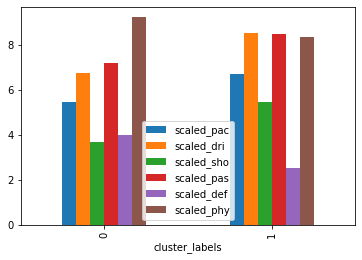

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [70]:
# normalize data
fifa['scaled_pas'] = whiten(fifa['pas'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# scaled_features
scaled_features = ['scaled_pac', 'scaled_dri','scaled_sho',
                   'scaled_pas', 'scaled_def', 'scaled_phy'] 
# Generate cluster centers
cluster_centers, distortion = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])